In [ ]:
import pandas as pd
df=pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
print(df.describe(include=['object']))

# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Summary statistics for numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  89

**SOME COLUMNS SUCH AS PASSENGER ID, NAME, TICKET, FARE ARE IRRELEVANT FOR THE MODELLING OR EDA PURPOSE SO, DROPPING THEM SEEMS MORE PRACTICAL**

**APART FROM THAT CABIN COLUMN AS WE HAVE SEEN ABOVE HAS HIGH AMOUT OF BLANK COLUMNS AND SEEMS IRRELEVANT FOR ANALYSIS OR MODEL PIRPOSE SO WE'LL DROP THAT TOO.**

In [ ]:
df=df.drop(["PassengerId","Ticket","Fare","Cabin","Name"],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# Define age categories function
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age < 65:
        return 'Adult'
    else:
        return 'Elderly'

# Apply age categories to the 'Age' column
df['Age_Category'] = df['Age'].apply(categorize_age)

# Print the first few rows to verify the changes
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch Embarked Age_Category
0         0       3    male  22.0      1      0        S        Adult
1         1       1  female  38.0      1      0        C        Adult
2         1       3  female  26.0      0      0        S        Adult
3         1       1  female  35.0      1      0        S        Adult
4         0       3    male  35.0      0      0        S        Adult


In [ ]:
# Combine 'SibSp' and 'Parch' columns to represent family size including the person themselves
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_Category,Family_Size
0,0,3,male,22.0,1,0,S,Adult,2
1,1,1,female,38.0,1,0,C,Adult,2
2,1,3,female,26.0,0,0,S,Adult,1
3,1,1,female,35.0,1,0,S,Adult,2
4,0,3,male,35.0,0,0,S,Adult,1


**LETS DO LITTLE BIT OF EDA**

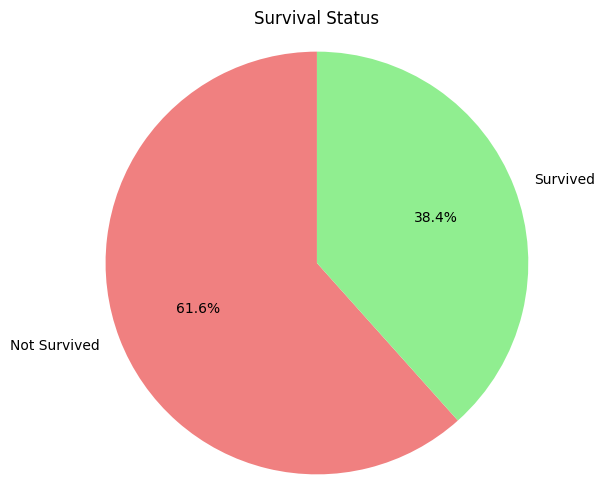

In [ ]:
import matplotlib.pyplot as plt

# Count the number of survivors and non-survivors
survival_counts = df['Survived'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Survival Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

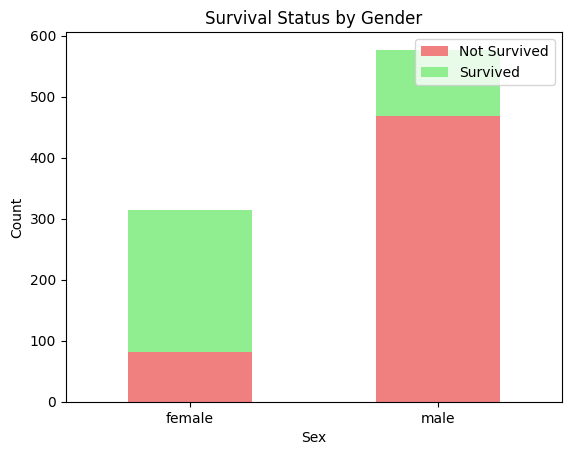

In [ ]:
import matplotlib.pyplot as plt

# Count the number of survivors and non-survivors by sex
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Plot the grouped bar plot
survival_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Status by Gender')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

In [ ]:
df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


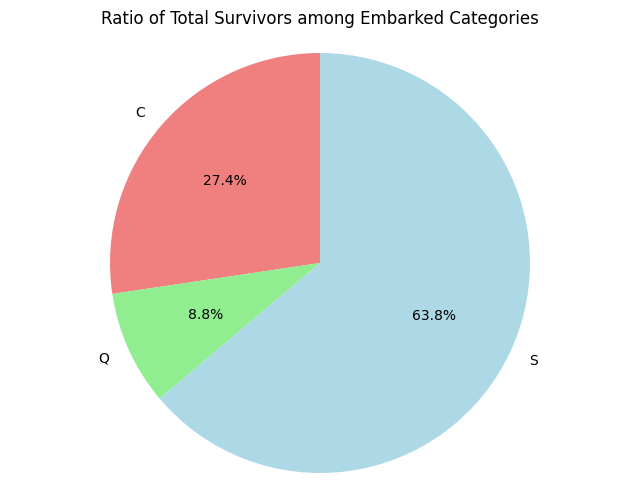

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of survivors for each embarked port
total_survived = df.groupby('Embarked')['Survived'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_survived, labels=total_survived.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Ratio of Total Survivors among Embarked Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

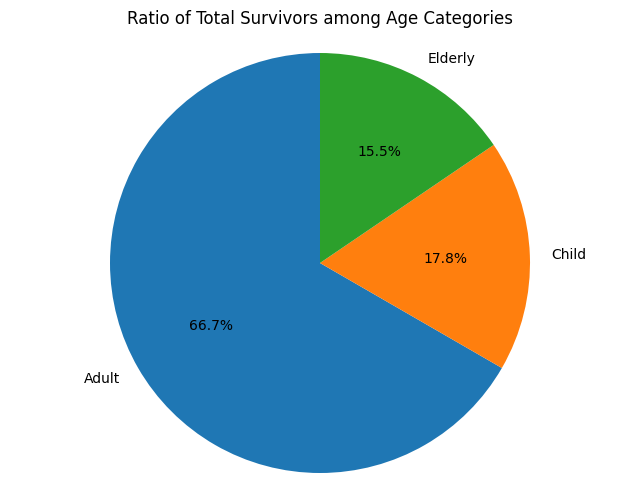

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of survivors for each age category
total_survived_age = df.groupby('Age_Category')['Survived'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_survived_age, labels=total_survived_age.index, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of Total Survivors among Age Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

SO FROM ABOVE EDA WE CAN IMPLY THAT:


1.   SURVIVAL RATE WAS ALMOST HALF AMONG ALL THE PASSENGERS
2.   RATIO OF FEMALES SURVIVED WAS MUCH GREATER THAN MALES
3.   INDIVIDUAL WITH 2,3,4 FAMILY MEMBERS HAD A HIGH SURVIVAL AS COMPARED TO LARGER FAMILIES
4.   Port of Embarkation(EMBARKED: (S: Southampton, C: Cherbourg, Q: Queenstown); PEOPLE BOARDED FROM S SURVIVED ALMOST DOUBLE AS COMPARED TO C+Q
5.   ADULTS SURVIVAL WAS TOO MUCH AS COMPARED TO OTHER CATEGORY WHICH IS QUITE OBVOUS



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Drop 'Age' column along with 'SibSp' and 'Parch' if desired
df.drop(['Age', 'SibSp', 'Parch'], axis=1, inplace=True)

# Encode categorical columns
label_encoders = {}
for column in ['Sex', 'Embarked', 'Age_Category']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Now X and y are ready for modeling

**MODEL :=**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate the models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC AUC': roc_auc}

In [ ]:
# Display the results
results_df = pd.DataFrame(results)
print(results_df)

           Logistic Regression  Decision Tree  Random Forest  \
Accuracy              0.787709       0.815642       0.821229   
Precision             0.736842       0.859649       0.850000   
Recall                0.756757       0.662162       0.689189   
F1-score              0.746667       0.748092       0.761194   
ROC AUC               0.783140       0.792986       0.801737   

           Support Vector Machine  Gradient Boosting  
Accuracy                 0.804469           0.804469  
Precision                0.800000           0.809524  
Recall                   0.702703           0.689189  
F1-score                 0.748201           0.744526  
ROC AUC                  0.789447           0.787452  


To determine the best and worst models:

1. Highest Accuracy: Random Forest model has the highest accuracy of 0.8212.

2. Highest Precision: If the focus is on minimizing false positives (i.e., correctly identifying survivors), then the Decision Tree model has the highest precision of 0.8596.

3. Highest Recall: If the priority is to minimize false negatives (i.e., correctly identifying all survivors), then the Logistic Regression model has the highest recall of 0.7568.

4. Best Balance of Precision and Recall: Random Forest model would still be considered the best model with an F1-score of 0.7612.
